In [1]:
from __future__ import division
import numpy as np
from neuron import h, gui
import matplotlib.pyplot as plt
plt.ion();

### Instantiate model

In [2]:
h.load_file("import3d.hoc")
h.nrn_load_dll("mods/nrnmech.dll")  # this needs to be added on Windows
# for some weird reason NEURON doesn't care about the OS
# and Windows uses the forward slash: '/' as well...
h.load_file("models/L5PCbiophys3.hoc")
h.load_file("models/L5PCtemplate.hoc")
morph_fname = "morphologies/cell1.asc"
L5PC = h.L5PCtemplate(morph_fname)

### Add input, recorders, run sim, plot results

In [3]:
# input
stim = h.IClamp(L5PC.soma[0](0.5))
stim.dur = 1000
stim.delay = 400
stim.amp = 0.793
# recording
t = h.Vector()
t.record(h._ref_t)
soma_v = h.Vector()
soma_v.record(L5PC.soma[0](0.5)._ref_v)
nexus_v = h.Vector()
nexus_v.record(L5PC.apic[36](0.9)._ref_v)
stim_current = h.Vector()
stim_current.record(stim._ref_i)
# run
h.v_init = -80
h.tstop = 1500
h.celsius = 37
h.run();

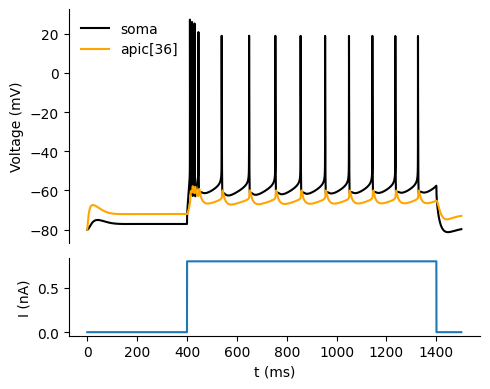

In [4]:
# plot the injected current and the voltage responses (in soma and apical trunk)
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(5, 4), gridspec_kw={'height_ratios': [3, 1]})
ax0.plot(t, soma_v, 'k', label='soma')
ax0.plot(t, nexus_v, 'orange', label='apic[36]')
ax0.legend(frameon=False)
ax1.plot(t, stim_current)

ax0.set_ylabel('Voltage (mV)')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)

ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()